In [22]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob


In [4]:

data = []

with open("tip.json", "r", encoding="utf-8") as json_file:
    for line in json_file:
        try:
            # Cargar cada línea como un objeto JSON y agregarlo a la lista de datos
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error al decodificar JSON en línea: {line}")
            continue

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar información general del DataFrame
print("Información general del DataFrame:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualizar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Visualizar algunas columnas específicas
print("\nColumnas específicas:")
print(df[["user_id", "date"]])

# Conteo de valores únicos en una columna
print("\nConteo de valores únicos en la columna 'user_id':")
print(df["user_id"].value_counts())



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB
None

Estadísticas descriptivas:
       compliment_count
count     908915.000000
mean           0.012525
std            0.120763
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            6.000000

Primeras filas del DataFrame:
                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5c

In [25]:
df.isnull().sum()

user_id             0
business_id         0
text                0
compliment_count    0
sentiment           0
dtype: int64

In [26]:
# Revisar si hay valores duplicados
df.duplicated().sum()


2140

In [ ]:
df = df.drop_duplicates()

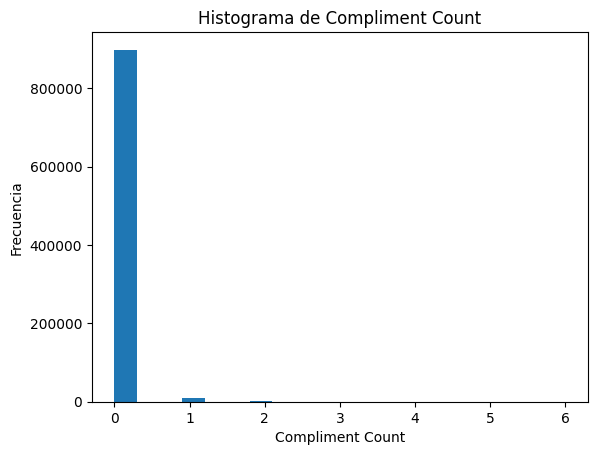

In [7]:
df["compliment_count"].plot(kind="hist", bins=20)
plt.title("Histograma de Compliment Count")
plt.xlabel("Compliment Count")
plt.ylabel("Frecuencia")
plt.show()

In [13]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

In [14]:

tips_por_mes = df.resample("M")["text"].count()

# Mostrar el resultado
print(tips_por_mes)


date
2009-04-30      47
2009-05-31      64
2009-06-30      72
2009-07-31      75
2009-08-31      92
              ... 
2021-09-30    2708
2021-10-31    2868
2021-11-30    2785
2021-12-31    1777
2022-01-31     925
Freq: M, Name: text, Length: 154, dtype: int64


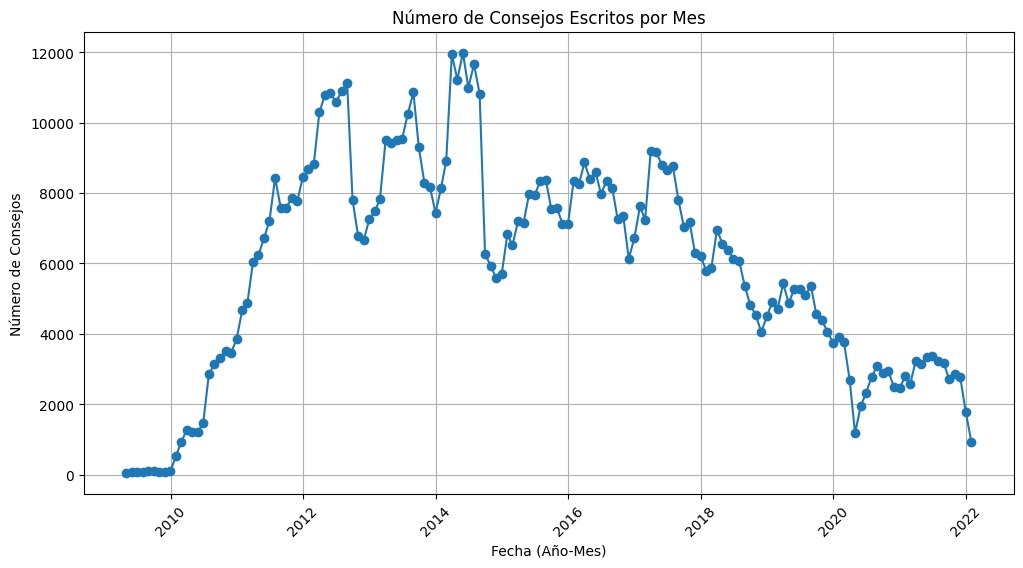

In [15]:


plt.figure(figsize=(12, 6))
plt.plot(tips_por_mes, marker='o', linestyle='-')
plt.title("Número de Consejos Escritos por Mes")
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Número de Consejos")
plt.xticks(rotation=45)
plt.grid()
plt.show()

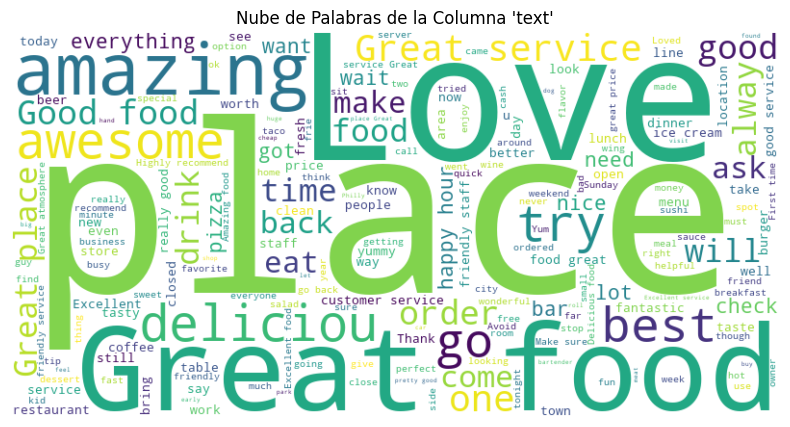

In [16]:
# Unir todos los textos en una sola cadena
text_data = " ".join(text for text in df["text"])

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de la Columna 'text'")
plt.show()

In [19]:
# Crear un objeto TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10)

# Ajustar y transformar los textos
tfidf_matrix = tfidf_vectorizer.fit_transform(df["text"])

# Obtener las palabras clave más importantes
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Palabras clave más importantes:")
print(feature_names)

Palabras clave más importantes:
['and' 'food' 'for' 'good' 'great' 'in' 'is' 'it' 'the' 'to']


In [24]:

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positivo"
    elif analysis.sentiment.polarity < 0:
        return "Negativo"
    else:
        return "Neutral"

# Aplicar la función a la columna "text"
df["sentiment"] = df["text"].apply(analyze_sentiment)

# Mostrar el análisis de sentimientos
print("Análisis de sentimientos:")
print(df["sentiment"].value_counts())

Análisis de sentimientos:
sentiment
Positivo    585943
Neutral     216132
Negativo    106840
Name: count, dtype: int64
